In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# defining path 
path=(r"C:\Users\hardjan\Retail Supermarket")

In [3]:
# Importing Data set 
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'samplesuperstore1.csv'), index_col = False)

In [9]:
df.head(30)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2/27/2018
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,4/15/2015
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6/12/2018
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,8/19/2015
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,1/13/2018
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,11/12/2016
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,3/1/2016
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,11/13/2018
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,12/29/2022
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,8/30/2016


### Check the columns

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'date'],
      dtype='object')

### Finding missing values

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
date            0
dtype: int64

#### No Missing Values found

### Checking the data for Duplicates 

In [6]:
dups=df.duplicated()

In [7]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

#### No duplicates found 

### Extreme Value Checks 

C:\Users\hardjan\AppData\Local\Temp\ipykernel_8624\887965867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'], bins=25) # Shows extreme values
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Profit', ylabel='Density'>

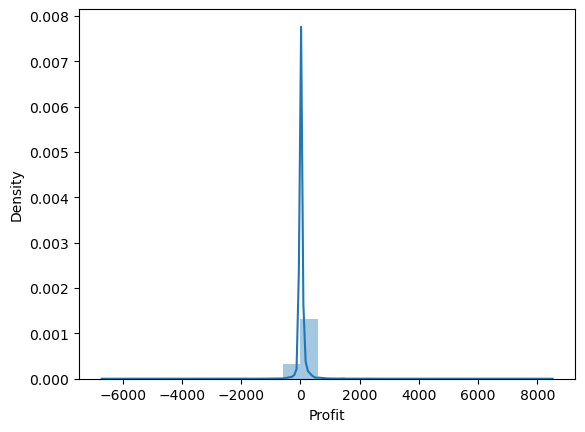

In [10]:
sns.distplot(df['Profit'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first0

In [12]:
# Check the mean 
df['Profit'].mean() 

28.65689630778467

In [13]:
# check the median 
df['Profit'].median() 

8.6665

In [14]:
# check the max value 
df['Profit'].max() 

8399.976

In [15]:
# check the min value 
df['Profit'].min() 

-6599.978

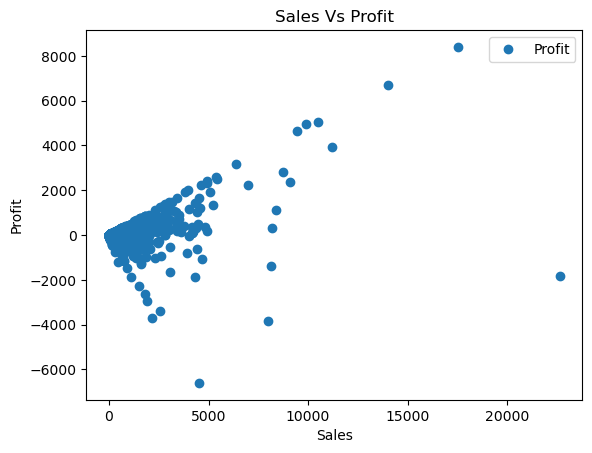

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales Vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

#### In this scatter plot we can clearly see that more sales does not mean more profit. It depends on discount as well. When Sales is high and there is low discount, the profit margin is higher

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [18]:
X

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [19]:
y

array([[ 41.9136],
       [219.582 ],
       [  6.8714],
       ...,
       [ 19.3932],
       [ 13.32  ],
       [ 72.948 ]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Regression Analysis 

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

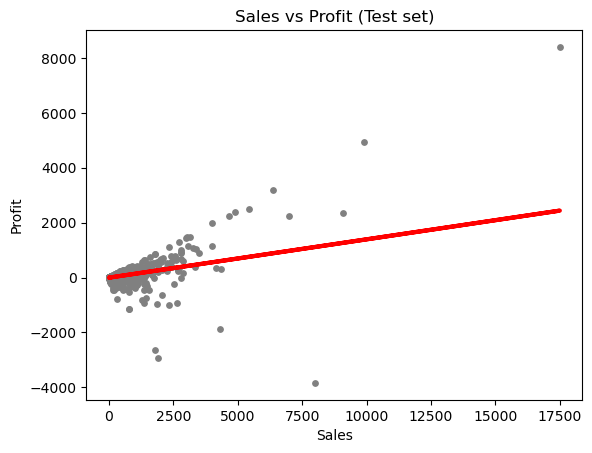

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

#### The actual Sales and profit is not having that strong relation

#### Check the model performance statistics—MSE and R2 score.

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  51349.125157537026
R2 score:  0.3077658276679903


 ### The R2 is only 30% which means its a very poor relation 

In [27]:
y_predicted

array([[-1.75662971e+00],
       [-1.85432563e+00],
       [-1.03056598e-01],
       ...,
       [ 2.45360996e+02],
       [ 2.87136527e+00],
       [ 2.24946099e+00]])

#### Compare the predicted y values with the actual y values in a dataframe.


In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554576
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


#### Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

#### The model didn't perform as expected and as we compare the actual and predicted DataFrame there is a vast difference which doesn't show us the clear picture of what hypothesis we have and what we want to depict from this Analysis.

#### There seems to be a bit of data bias or there has been mistakes in entering data because lot of negative enteries have been observed in the Profit column when we look at the min and max values of the Profit.